## From Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('auto_insurance_sweden.csv')
data.describe()

,Total Claims,Total Payments
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


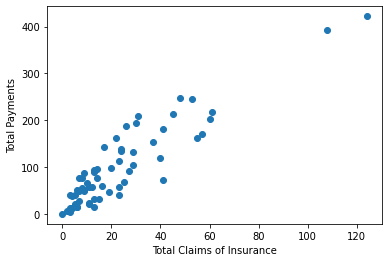

In [3]:
X = data["Total Claims"]
Y = data["Total Payments"]
plt.scatter(X, Y)
plt.xlabel("Total Claims of Insurance")
plt.ylabel("Total Payments")
plt.show()

In [4]:
# Splitting the data
# Taking 80% for training and 20% for testing

X_test = X[:int(len(X)*0.3)]
Y_test = Y[:int(len(Y)*0.3)]

X_train = X[int(len(X)*0.3):]
Y_train = Y[int(len(Y)*0.3):]

In [5]:
# Calculating the mean, variance and covariance to determine the coefficients

# mean
x_mean = X_train.sum()/len(X_train)
y_mean = Y_train.sum()/len(Y_train)
print(f'Mean : {x_mean}')

# variance
x_var = ((X_train - x_mean)**2).sum()
x_var /= len(X_train)
print(f'Variance : {x_var}')

# Covariance
x_covar = ((X_train - x_mean)*(Y_train - y_mean)).sum()
x_covar /= len(X_train)
print(f'Covariance : {x_covar}')


Mean : 19.2
Variance : 252.42666666666673
Covariance : 879.824888888889


In [6]:
# Determine the coefficients of y = b1*x + b0

b1 = x_covar/x_var
print(f'slope is {b1}')

b0 = y_mean - b1*x_mean
print(f'intercept is {b0}')

slope is 3.485467286428621
intercept is 22.67680587834826


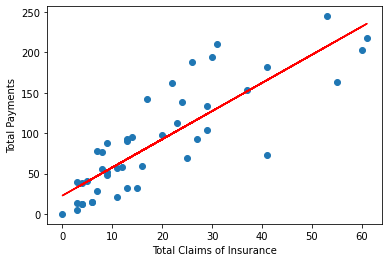

In [7]:
# fitting the linear regression line

plt.scatter(X_train, Y_train)
plt.plot(X_train, b0 + b1*X_train, '-r')
plt.xlabel("Total Claims of Insurance")
plt.ylabel("Total Payments")
plt.show()

In [8]:
# calculating r-squared

y_pred = X_test*b1 +b0

residual = Y_test - y_pred
RSS = (residual**2).sum()
TSS = ((Y_test - Y_test.mean())**2).sum()

rsqr = 1 - RSS/TSS
rsqr

0.910162208719141

In [9]:
# mean squared error

variance = ((Y_test - y_pred)**2).sum()

MSE = variance/len(Y_test)
MSE

1332.812123876309

## Using direct model

In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_train = X_train.reshape(-1,1)

In [11]:
reg.fit(X_train, Y_train)

LinearRegression()

In [12]:
print("slope is", float(reg.coef_))
print("intercept is", reg.intercept_)

slope is 3.4854672864286216
intercept is 22.676805878348247


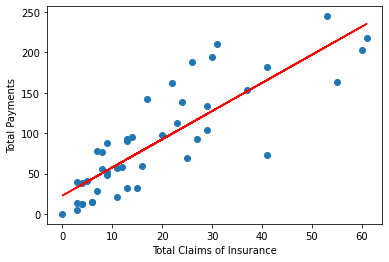

In [13]:
# fitting the linear regression line

plt.scatter(X_train, Y_train)
plt.plot(X_train, reg.intercept_ + float(reg.coef_)*X_train, '-r')
plt.xlabel("Total Claims of Insurance")
plt.ylabel("Total Payments")
plt.show()

In [14]:
# calculating r-squared

X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(-1,1)


r_sqr = reg.score(X_test, Y_test)
print(r_sqr)

0.910162208719141
